In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout,Activation, Flatten
from keras.layers import Dropout,Activation 
import tensorflow as tf
import cv2                  
from tqdm import tqdm
import os                 
import random as rn
from random import shuffle  

In [2]:
X=[]
Z=[]
IMG_SIZE=150
category1_dir="Dataset/train/category 1"
category2_dir='Dataset/train/category 2'
category3_dir="Dataset/train/category 3"
category4_dir="Dataset/train/category 4"

In [3]:
def assign_label(img,category_type):
    return category_type

In [4]:
def make_train_data(category_type,dir):
    for img in tqdm(os.listdir(dir)):
        label=assign_label(img,category_type)
        path = os.path.join(dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [5]:
make_train_data('category1',category1_dir)
print(len(X))

100%|██████████| 102/102 [00:01<00:00, 99.50it/s]

102


In [6]:
make_train_data('category2',category2_dir)
print(len(X))

100%|██████████| 107/107 [00:00<00:00, 114.10it/s]

209


In [7]:
make_train_data('category3',category3_dir)
print(len(X))

100%|██████████| 112/112 [00:00<00:00, 129.34it/s]

321


In [8]:
make_train_data('category4',category4_dir)
print(len(X))

100%|██████████| 119/119 [00:01<00:00, 109.59it/s]

440


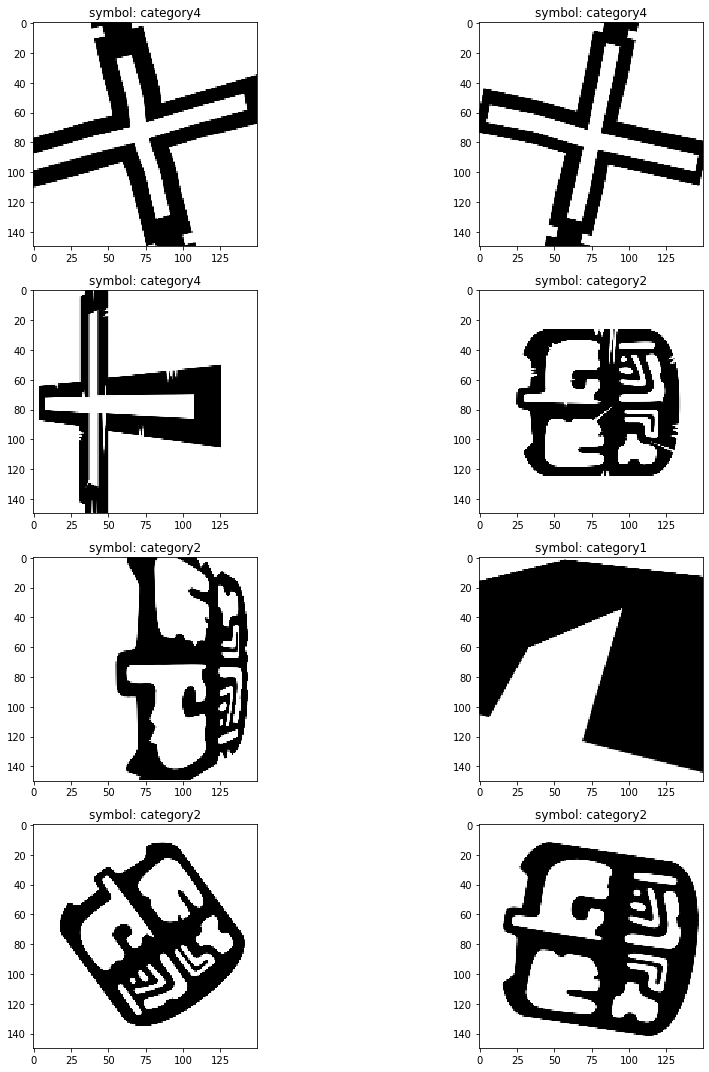

In [9]:
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('symbol: '+Z[l])
        
plt.tight_layout()
        

In [10]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,4)
X=np.array(X)
X=X/255
print(len(Y))

440


In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [12]:
#building model 
model = Sequential()
model.add(InputLayer(input_shape=(IMG_SIZE,IMG_SIZE,3)))
# 1st bconv block 
model.add(Conv2D(32, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
# 2nd bconv block 
model.add(Conv2D(64, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
# 3rd bconv block 
model.add(Conv2D(128, (5, 5), activation='relu', strides=(2, 2), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
#4th conv block
model.add(Conv2D(128, (5, 5), activation='relu', strides=(2, 2), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
# 1st full connected layer
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
# 2nd full connected layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
#output layer
model.add(Dense(4, activation='softmax'))


In [13]:
#image augmentation 
imagegen = ImageDataGenerator(  featurewise_center=False,samplewise_center=False,rotation_range=50,zoom_range = 0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True)
imagegen.fit(x_train)

In [14]:
# compile+fit
sgd = SGD(lr=0.001,  momentum=0.95, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
fitmodel=model.fit(imagegen.flow(x_train,y_train, shuffle=False, batch_size=64), epochs=50,validation_data = (x_test,y_test))

Epoch 1/50
6/6 [==============================] - 21s 4s/step - loss: 1.3863 - accuracy: 0.2246 - val_loss: 1.3875 - val_accuracy: 0.1667
Epoch 2/50
6/6 [==============================] - 23s 4s/step - loss: 1.3846 - accuracy: 0.2754 - val_loss: 1.3868 - val_accuracy: 0.2121
Epoch 3/50
6/6 [==============================] - 21s 4s/step - loss: 1.3837 - accuracy: 0.2487 - val_loss: 1.3858 - val_accuracy: 0.2424
Epoch 4/50
6/6 [==============================] - 22s 4s/step - loss: 1.3804 - accuracy: 0.2861 - val_loss: 1.3849 - val_accuracy: 0.2424
Epoch 5/50
6/6 [==============================] - 21s 4s/step - loss: 1.3775 - accuracy: 0.2995 - val_loss: 1.3841 - val_accuracy: 0.2424
Epoch 6/50
6/6 [==============================] - 21s 3s/step - loss: 1.3775 - accuracy: 0.2941 - val_loss: 1.3833 - val_accuracy: 0.2424
Epoch 7/50
6/6 [==============================] - 21s 3s/step - loss: 1.3742 - accuracy: 0.3075 - val_loss: 1.3825 - val_accuracy: 0.2424
Epoch 8/50
6/6 [==================

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         4

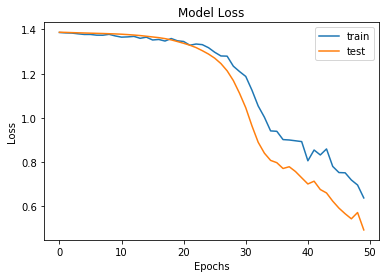

In [16]:
plt.plot(fitmodel.history['loss'])
plt.plot(fitmodel.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

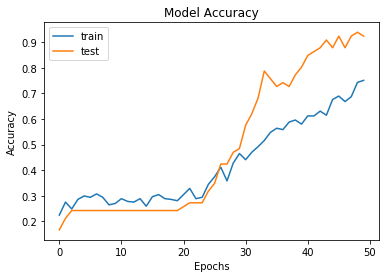

In [17]:
plt.plot(fitmodel.history['accuracy'])
plt.plot(fitmodel.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [18]:
img_id=[]
cat=[]
filenames = glob.glob("Dataset/test/*.png")
for filename in filenames:  
        img = cv2.imread(filename,cv2.IMREAD_COLOR) 
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE)) 
        img_arr_conv = np.array([cv2.resize(img, dsize=(IMG_SIZE, IMG_SIZE))])
        img_id.append(filename)
        pred=model.predict_classes(img_arr_conv) 
        if (pred==0):{cat.append("categoty 1")}
        elif (pred==1):{cat.append("category 2")} 
        elif (pred==2) : {cat.append("category 3")} 
        elif (pred==3): { cat.append("category 4") }

         

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [19]:
data = {'img_id': img_id,'Category': cat}
df = pd.DataFrame (data, columns = ['img_id','Category'])
df.to_csv("result.csv", index=False)
df

,img_id,Category
0,Dataset/test\1051.png,categoty 1
1,Dataset/test\1052.png,categoty 1
2,Dataset/test\4043.png,category 3
3,Dataset/test\4050.png,category 3
4,Dataset/test\4051.png,category 3
5,Dataset/test\4052.png,category 3
6,Dataset/test\6052.png,category 2
7,Dataset/test\6053.png,category 4
8,Dataset/test\C052.png,category 4
9,Dataset/test\C053.png,category 4
